# 2LS and Thermal oscillator

[[[[-3.94949158e-04+7.11079936e-05j -8.79605905e-10-8.15006955e-10j]
   [-9.30623908e-06-3.03572746e-05j -5.79308188e-09+6.08863558e-09j]]

  [[ 1.14193977e-13+1.02342705e-13j  8.16560978e-04-4.11832087e-03j]
   [-5.78101860e-09+6.08891690e-09j  7.52465658e-05+9.97007504e-06j]]]


 [[[-9.60792036e-06-3.14051489e-05j -5.76185713e-09+6.05655492e-09j]
   [-3.68464573e-04+6.51430840e-05j -9.37415670e-10-7.47563552e-10j]]

  [[-5.81252454e-09+6.12147349e-09j  7.78338377e-05+1.03581604e-05j]
   [ 1.19851789e-13+9.57419828e-14j  8.01265752e-04-4.09440000e-03j]]]]


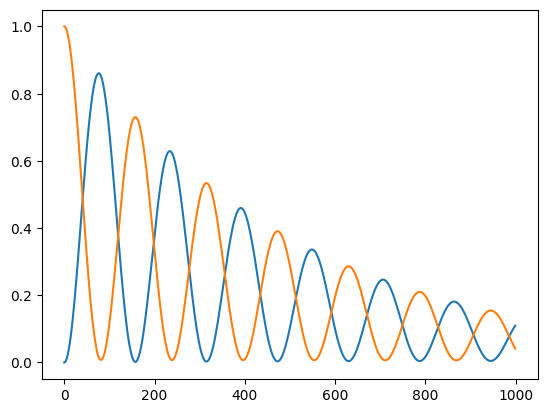

In [ ]:
#(2LS means two level system) (in fact it's a oscillator internally coupled to a thermal bath) dynamics via Liouvillian approach
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# time parameters
dt=0.2
tmax=1000

# system, bath and coupling parameters
Delta=0.5 # detuning of 2LS
Omega=0 # Rabi frequency of 2LS
Gamma=0.5 # decay rate of 2LS
nu=1 # frequency of oscillator
kappa=0.01 # decay rate of oscillator
nbar=0 # mean thermal occupation number of bath (now its a zero-temperature bath, that's why we get the final ground state for the oscillator and the excited state for the 2LS)
g=.1 # coupling strength between 2LS and oscillator

nmax=10 # truncation of oscillator Hilbert space (if the cuttoff is too small the results will be wrong)
# ideally nmax should be several times larger than nbar (and nmax>>1, ideally infinite but this is not possible numerically)

# define sigma z
sz= np.array([[1,0],
             [0,-1]])
# define sigma x
sx= np.array([[0,1],
             [1,0]])
# define sigma plus
sp= np.array([[0,1],
             [0,0]])
# define sigma minus
sm= np.array([[0,0],
             [1,0]])
# define number operator
n=np.diag(np.arange(nmax))
# define annihilation and creation operators for oscillator
a=np.diag(np.sqrt(np.arange(nmax-1)+1),1)
ad=a.T.conj()
# define identity for oscillator
Idv=np.eye(nmax)
# define identity for 2LS
Ida = np.eye(2)

# define Hamiltonians
Hv=nu*n # oscillator Hamiltonian (v of vibrational modes)
Ha = Delta*sz + Omega*sx # 2LS Hamiltonian (a of atom)
# total Hamiltonian
H=np.kron(Ha,Idv)+np.kron(Ida,Hv)+g*np.kron(sx,ad+a) # the position of the oscillator is proportional to (a+ad)

# define total identity (of the full hilbert space)
Id=np.kron(Ida,Idv)
# define total creation and annihilation operators
Ad=np.kron(Ida,ad)
A=np.kron(Ida,a)
# define total number operator
N=Ad@A
# define total sigma z operator
SZ=np.kron(sz,Idv)
# we use capitals to denote operators acting on the full Hilbert space (the 'promoted' operators)

# construct Liouvillian
L=(1j*(np.kron(H,Id)-np.kron(Id,H.T))+ # Hamiltonian part (the commutator beetween H and rho)
   kappa*(nbar)*(2*np.kron(Ad,A.T)-np.kron(A@Ad,Id)-np.kron(Id,A@Ad))+ # Dissipator part due to absorption (gets population up)
   kappa*(nbar+1)*(2*np.kron(A,Ad.T)-np.kron(Ad@A,Id)-np.kron(Id,Ad@A))) # Dissipator part due to emission (gets population down)
# the nbar and nbar+1 terms correspond to the thermal bath effects, without them it would be an infinite-temperature bath
# the relation between nbar and the temperature is nbar/(nbar+1)=exp(-hbar*nu/kB*T)  (kB is the Boltzmann constant, we call exp(-hbar*nu/kB*T) the Boltzmann factor)

# with some value of the parameters, we get the Jaynes-Cummings model (plus dissipation)

# exponentiate Liouvillian, dymanical map
EL=expm(L*dt)
EL2=expm(L*2*dt) # this is useful to compute two-time correlation functions such us tensor correlation functions

# initial state
rhov0=np.diag(np.zeros(nmax)) # oscillator initially in ground state
rhov0[0,0]=1
rhoa0 = np.array([[1,0],   # 2LS initially in excited state
             [0,0]])
rho0=np.kron(rhoa0,rhov0)
rhot=rho0.flatten()

# arrays to store expectation values, a way to trak the dynamics of both subsystems
nt=np.zeros(tmax)
szt=np.zeros(tmax)

nv=N.flatten() # this is going to help us to compute expectation values of number operator
szv=SZ.flatten()

for ti in np.arange(0,tmax,1):
    nt[ti]=np.real(nv@rhot)
    szt[ti]=np.real(szv@rhot)
    rhot=EL@rhot

plt.plot(nt) # it's going to appear in color blue
plt.plot((szt+1)/2) # it's going to appear in orange

Tracer=np.kron(np.eye(4),Idv.flatten())
Expander=np.kron(np.eye(4),rhov0.flatten()).T
Ea=Tracer@EL@Expander
Ea2=Tracer@EL2@Expander

T2=Ea2-Ea@Ea

# print the tensor correlation matrix at time t=2*dt
print(T2.reshape(2,2,2,2))

